In [ ]:
import json

In [ ]:
def get_avg_jaccard(data):
  sum = 0
  count = 0
  print("Words where the Jaccard idx was None:")
  for word_info in data:
      if word_info['jaccard'] is not None:
          count += 1
          sum += word_info['jaccard']
      else:
        print(word_info['word'])
  return sum/count


For Elections, Participation, and Political Processes, the avg Jaccard idx is 0.07481181327019971.

Government Structure and Institutions: 0.0854168621196485

Political theory: 0.08248409012727898

Legal, Administrative, and Regulatory Terms: 0.062256335282651065

Political Ideologies: 0.16482382426654868

Economic and Policy-Related Terms: 0.08873241209192279

Historical Movements: 0.09677913881036777

In [ ]:
file_path = '/content/process_word_comparisons.json'
with open(file_path, 'r') as f:
    data = json.load(f)

print(get_avg_jaccard(data))
# data is a list, each elt is a dictionary
# keys of the dictionary are the word, the filtered chinese neighbors (translated back to english), filtered english neighbors, and jaccard index

Words where the Jaccard idx was None:
Primary
General
Turnout
0.07481181327019971


In [ ]:
file_path = '/content/institution_word_comparisons.json'
with open(file_path, 'r') as f:
    data = json.load(f)

print(get_avg_jaccard(data))


Words where the Jaccard idx was None:
Legislature
Executive
Localism
Presidency
Vice-presidency
0.0854168621196485


In [ ]:
file_path = '/content/political_theory_word_comparisons.json'
with open(file_path, 'r') as f:
    data = json.load(f)

print(get_avg_jaccard(data))

Words where the Jaccard idx was None:
Establishment
Meritocracy
0.08248409012727898


In [ ]:
file_path = '/content/legal_word_comparisons.json'
with open(file_path, 'r') as f:
    data = json.load(f)

print(get_avg_jaccard(data))

Words where the Jaccard idx was None:
Anticorruption
Censorship
0.062256335282651065


In [ ]:
file_path = '/content/ideology_word_comparisons.json'
with open(file_path, 'r') as f:
    data = json.load(f)

print(get_avg_jaccard(data))

Words where the Jaccard idx was None:
Populism
Neoliberalism
Neoconservatism
Authoritarianism
Technocracy
0.16482382426654868


In [ ]:
for word_info in data:
    if word_info['jaccard'] is not None:
        print(word_info['word'])
        print(word_info['filtered_en'])
        print(word_info['filtered_zh'])
        print(word_info['jaccard'])


Liberalism
{'conservatism': 0.8208405375480652, 'progressivism': 0.782002329826355, 'conservativism': 0.7517427802085876, 'libertarianism': 0.7088434100151062, 'capitalism': 0.7076207399368286, 'republicanism': 0.7069107890129089, 'fascism': 0.700850784778595, 'socialism': 0.6978263258934021, 'marxism': 0.6794055104255676, 'neoliberalism': 0.6624491810798645, 'ideology': 0.6615965962409973, 'reformism': 0.6572422385215759, 'neoconservatism': 0.6523634195327759, 'radicalism': 0.647933304309845, 'communism': 0.6417220234870911, 'centrism': 0.6412743926048279, 'moralism': 0.6359211206436157, 'leftism': 0.6341915726661682, 'utopianism': 0.6324208378791809, 'populism': 0.6288953423500061, 'individualism': 0.6257312893867493, 'constitutionalism': 0.6256288290023804, 'anarchism': 0.6238975524902344, 'monarchism': 0.6216086149215698, 'authoritarianism': 0.6183038353919983, 'nationalism': 0.6092676520347595, 'corporatism': 0.6059248447418213, 'absolutism': 0.6051198244094849, 'totalitarianism':

In [ ]:
file_path = '/content/policy_word_comparisons.json'
with open(file_path, 'r') as f:
    data = json.load(f)

print(get_avg_jaccard(data))

Words where the Jaccard idx was None:
Recession
Taxation
0.08873241209192279


In [ ]:
file_path = '/content/movement_word_comparisons.json'
with open(file_path, 'r') as f:
    data = json.load(f)

print(get_avg_jaccard(data))

Words where the Jaccard idx was None:
Protest
Populism
Emancipation
Unionism
Liberation
Feminism
Environmentalism
Anarchism
Expansionism
Imperialism
0.09677913881036777


In [ ]:
file_path = '/content/neutral_word_comparisons.json'
with open(file_path, 'r') as f:
    data = json.load(f)

print(get_avg_jaccard(data))

Words where the Jaccard idx was None:
temperature
phone
0.13770756969208978


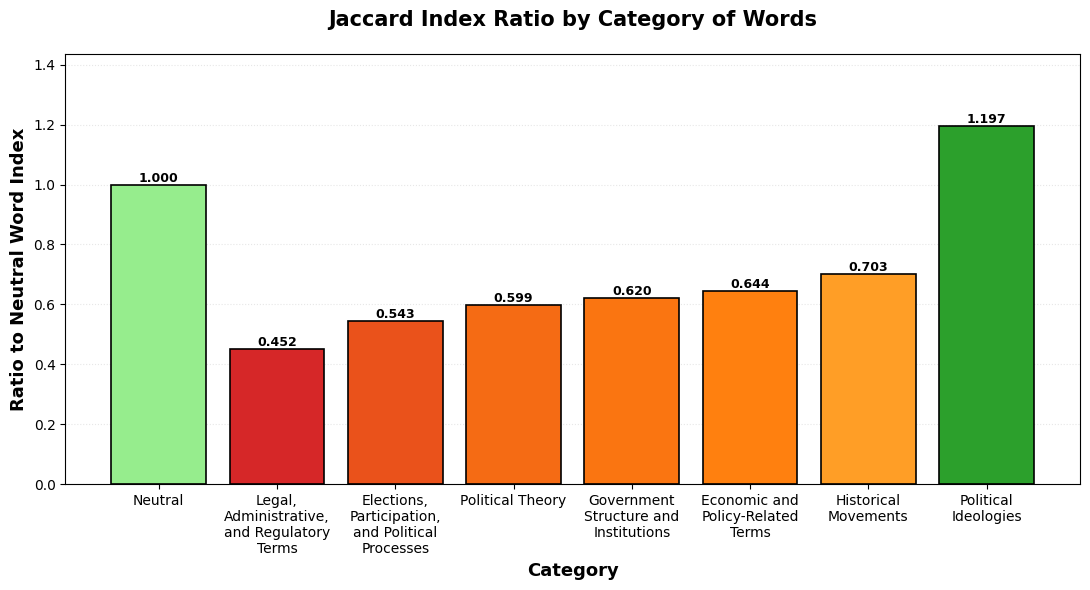

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

categories_data = [
    ('Elections, Participation, and Political Processes', 0.07481181327019971),
    ('Government Structure and Institutions', 0.0854168621196485),
    ('Political Theory', 0.08248409012727898),
    ('Legal, Administrative, and Regulatory Terms', 0.062256335282651065),
    ('Political Ideologies', 0.16482382426654868),
    ('Economic and Policy-Related Terms', 0.08873241209192279),
    ('Historical Movements', 0.09677913881036777)
]

neutral_index = 0.13770756969208978

ratios_data = [(cat, idx / neutral_index) for cat, idx in categories_data]
ratios_data.sort(key=lambda x: x[1]) # sort max
categories = ['Neutral'] + [cat for cat, _ in ratios_data] # neutral add
ratios = [1.0] + [ratio for _, ratio in ratios_data]

fig, ax = plt.subplots(figsize=(11, 6))
x_pos = np.arange(len(categories))
min_ratio = min(ratios)
max_ratio = max(ratios)
norm_ratios = [(r - min_ratio) / (max_ratio - min_ratio) for r in ratios]
colors_list = ['#d62728', '#ff7f0e', '#ffdd57', '#90ee90', '#2ca02c']
n_bins = 100
cmap = LinearSegmentedColormap.from_list('ratio_cmap', colors_list, N=n_bins)

bar_colors = [cmap(norm) for norm in norm_ratios]
bars = ax.bar(x_pos, ratios, color=bar_colors, edgecolor='black', linewidth=1.2)
ax.set_xlabel('Category', fontsize=13, fontweight='bold')
ax.set_ylabel('Ratio to Neutral Word Index', fontsize=13, fontweight='bold')
ax.set_title('Jaccard Index Ratio by Category of Words',
             fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x_pos)
categories_wrapped = []
for cat in categories:
    if len(cat) > 16:
        words = cat.split()
        lines = []
        current_line = []
        for word in words:
            current_line.append(word)
            if len(' '.join(current_line)) > 16:
                if len(current_line) > 1:
                    current_line.pop()
                    lines.append(' '.join(current_line))
                    current_line = [word]
                else:
                    lines.append(' '.join(current_line))
                    current_line = []
        if current_line:
            lines.append(' '.join(current_line))
        categories_wrapped.append('\n'.join(lines))
    else:
        categories_wrapped.append(cat)

ax.set_xticklabels(categories_wrapped, fontsize=10, ha='center')

for i, (bar, ratio) in enumerate(zip(bars, ratios)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{ratio:.3f}',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

ax.grid(axis='y', alpha=0.3, linestyle=':', linewidth=0.8)
ax.set_axisbelow(True)
ax.set_ylim(top=max(ratios) * 1.2)
plt.tight_layout()
plt.show()